# Polynomial Reression - Manual

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
# Seed
np.random.seed(101)

In [58]:
# Create x data
x = np.linspace(-10.0, 10.0, 200)

In [63]:
# Noise for y data
noise = 15 * np.random.randn(len(x))

In [64]:
# Create y data
y_true = 0.5 * x - 2 * (x ** 2) + noise

In [65]:
# Split data for training and testing (Not shuffle)
X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.4, random_state=101, shuffle=False)

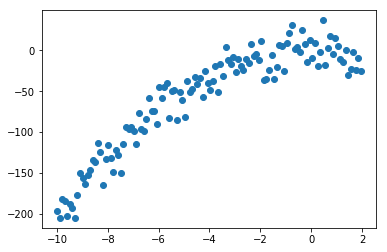

In [66]:
# Plot training data
plt.scatter(X_train,y_train)

In [67]:
# Function to compute MSE error
def compute_error(labels, predictions):
    """
        labels: y_true
        predictions: y_hat
    """
    return (np.sum((labels-predictions)**2))/len(labels)

In [68]:
def compute_gradient(features, labels, predictions):
    """
        features: x
        labels: y_true
        predictions: y_hat
    """
    w1_gradient = -np.sum(np.dot(features, (labels - predictions)))*(2/len(labels))
    w2_gradient = -np.sum(np.dot(features**2, (labels - predictions)))*(2/len(labels))
    b_gradient = -np.sum(labels - predictions)*(2/len(labels))
    return w1_gradient, w2_gradient, b_gradient

In [69]:
# Randomly initialize W1, W2 and b
W1 = np.random.randn()
W2 = np.random.randn()
b = np.random.randn()

In [ ]:
# Learning rate
learning_rate = 0.0001
# Epochs
epochs = 100000

# Training loop
for epoch in range(epochs):
    # Predictions for training data
    y_hat_train = W1*X_train + W2*(X_train**2) + b
    # Error
    error = compute_error(y_train, y_hat_train)
    # Gradient
    new_w1, new_w2, new_b = compute_gradient(X_train, y_train, y_hat_train)
    # Update W1
    W1 = W1 - learning_rate * new_w1
    # Update W2
    W2 = W2 - learning_rate * new_w2
    # Update b
    b = b - learning_rate * new_b
    # Print training progress every 1000 epochs
    if epoch % 1000 == 0:
        print('Epoch: {}, Error: {}'.format(epoch, error))

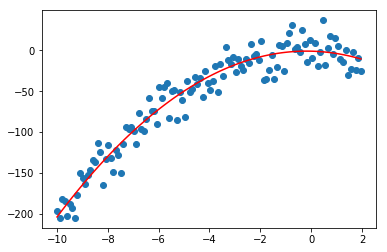

In [79]:
# Predictions for train data
y_hat_train = W1*X_train + W2*(X_train**2) + b
# Plot train data
plt.scatter(X_train, y_train)
# Plot line fitted to train data
plt.plot(X_train, y_hat_train, 'r')

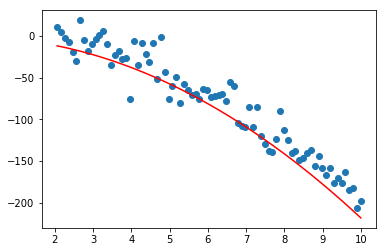

In [71]:
# Predictions for test data
y_hat_test = W1*X_test + W2*(X_test**2) + b
# Plot test data
plt.scatter(X_test, y_test)
# Plot line fitted to test data
plt.plot(X_test, y_hat_test, 'r')

# Polynomial Reression - Sklearn

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [73]:
# Add new axis to x
x_poly_train = X_train[:,np.newaxis]
x_poly_test = X_test[:,np.newaxis]

In [74]:
# Create Polynomial Features model
poly = PolynomialFeatures(degree=2)
# Fit data to model
x_poly_train = poly.fit_transform(x_poly_train)
x_poly_test = poly.transform(x_poly_test)

In [75]:
# Create Linear Regression model
lr = LinearRegression()
# Train model
lr.fit(x_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
# Predictions
train_preds = lr.predict(x_poly_train)
test_preds = lr.predict(x_poly_test)

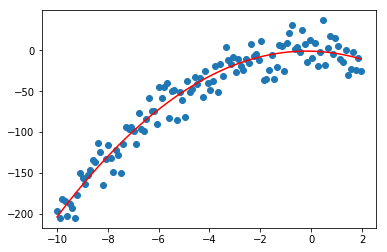

In [81]:
# Plot train data
plt.scatter(X_train, y_train)
# Plot line fitted to train data
plt.plot(X_train, train_preds, 'r')

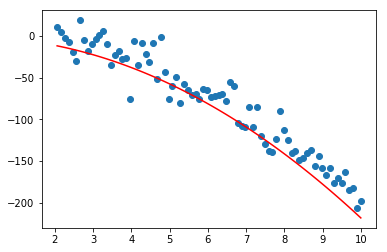

In [82]:
# Plot test data
plt.scatter(X_test, y_test)
# Plot line fitted to test data
plt.plot(X_test, test_preds, 'r')